Data Visualization Notebook
===

Visualizing the various input features available for modeling the likelihood ratios


In [9]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import mplhep as hep
import yaml
from utils import plot_kinematic_features
hep.style.use(hep.style.ATLAS)


In [10]:
with open("config.yml", "r") as f:
    config = yaml.safe_load(f)

# path prefix for saving cached data used between modules
path_prefix = config['path_prefix']
path_saved_data = config['path_saved_data']

# Path for saving interemdiate objects, like NN predictions
saved_data = f'{path_prefix}{path_saved_data}'

In [11]:
# Load the pre-processed dataset
data = pd.read_hdf(f"{saved_data}df_nominal.h5", key="dataset", mode='r')


In [12]:
# Get the dictionary that assigns an integer with each of the processes
labels_dict = config["labels_dict"]
print(labels_dict)

{'htautau': 0, 'ztautau': 1, 'ttbar': 2}


In [13]:
list_of_processes = list(labels_dict.keys())
print(list_of_processes)

['htautau', 'ztautau', 'ttbar']


Visualize the data
-

Understand and visualize the dataset you will be working with. See if there are input features you can use to further drive the sensitivity - by modeling an even higher-dimensional space than is used by default in this tutorial. 

For a detailed description of what the names of the features here mean, see - https://zenodo.org/records/15131565

In [17]:
# Full set of input features available
print(data.columns)

Index(['PRI_lep_pt', 'PRI_lep_eta', 'PRI_lep_phi', 'PRI_had_pt', 'PRI_had_eta',
       'PRI_had_phi', 'PRI_met', 'PRI_met_phi', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltar_had_lep', 'DER_pt_tot',
       'DER_sum_pt', 'DER_pt_ratio_lep_had', 'DER_met_phi_centrality',
       'PRI_jet_leading_pt', 'PRI_jet_leading_eta', 'PRI_jet_leading_phi',
       'PRI_jet_all_pt', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta',
       'PRI_jet_subleading_phi', 'DER_deltaeta_jet_jet', 'DER_mass_jet_jet',
       'DER_prodeta_jet_jet', 'DER_lep_eta_centrality', 'PRI_n_jets', 'njet_0',
       'njet_1', 'njet_2', 'log_PRI_lep_pt', 'log_PRI_had_pt', 'log_PRI_met',
       'log_DER_mass_vis', 'log_DER_pt_h', 'log_DER_pt_tot', 'log_DER_sum_pt',
       'log_PRI_jet_leading_pt', 'log_PRI_jet_all_pt',
       'log_PRI_jet_subleading_pt', 'log_DER_mass_jet_jet', 'weights',
       'detailed_labels', 'type', 'train_labels', 'jet1_mask', 'jet2_mask'],
      dtype='object')


In [16]:
# Subset of input features we eventually use for training
features = config["features"]

print(features)

['DER_mass_transverse_met_lep', 'log_DER_mass_vis', 'log_DER_pt_h', 'DER_deltar_had_lep', 'log_DER_pt_tot', 'log_DER_sum_pt', 'DER_pt_ratio_lep_had', 'DER_met_phi_centrality']


In [18]:
import sys, importlib
importlib.reload(sys.modules['utils'])
from utils import plot_kinematic_features

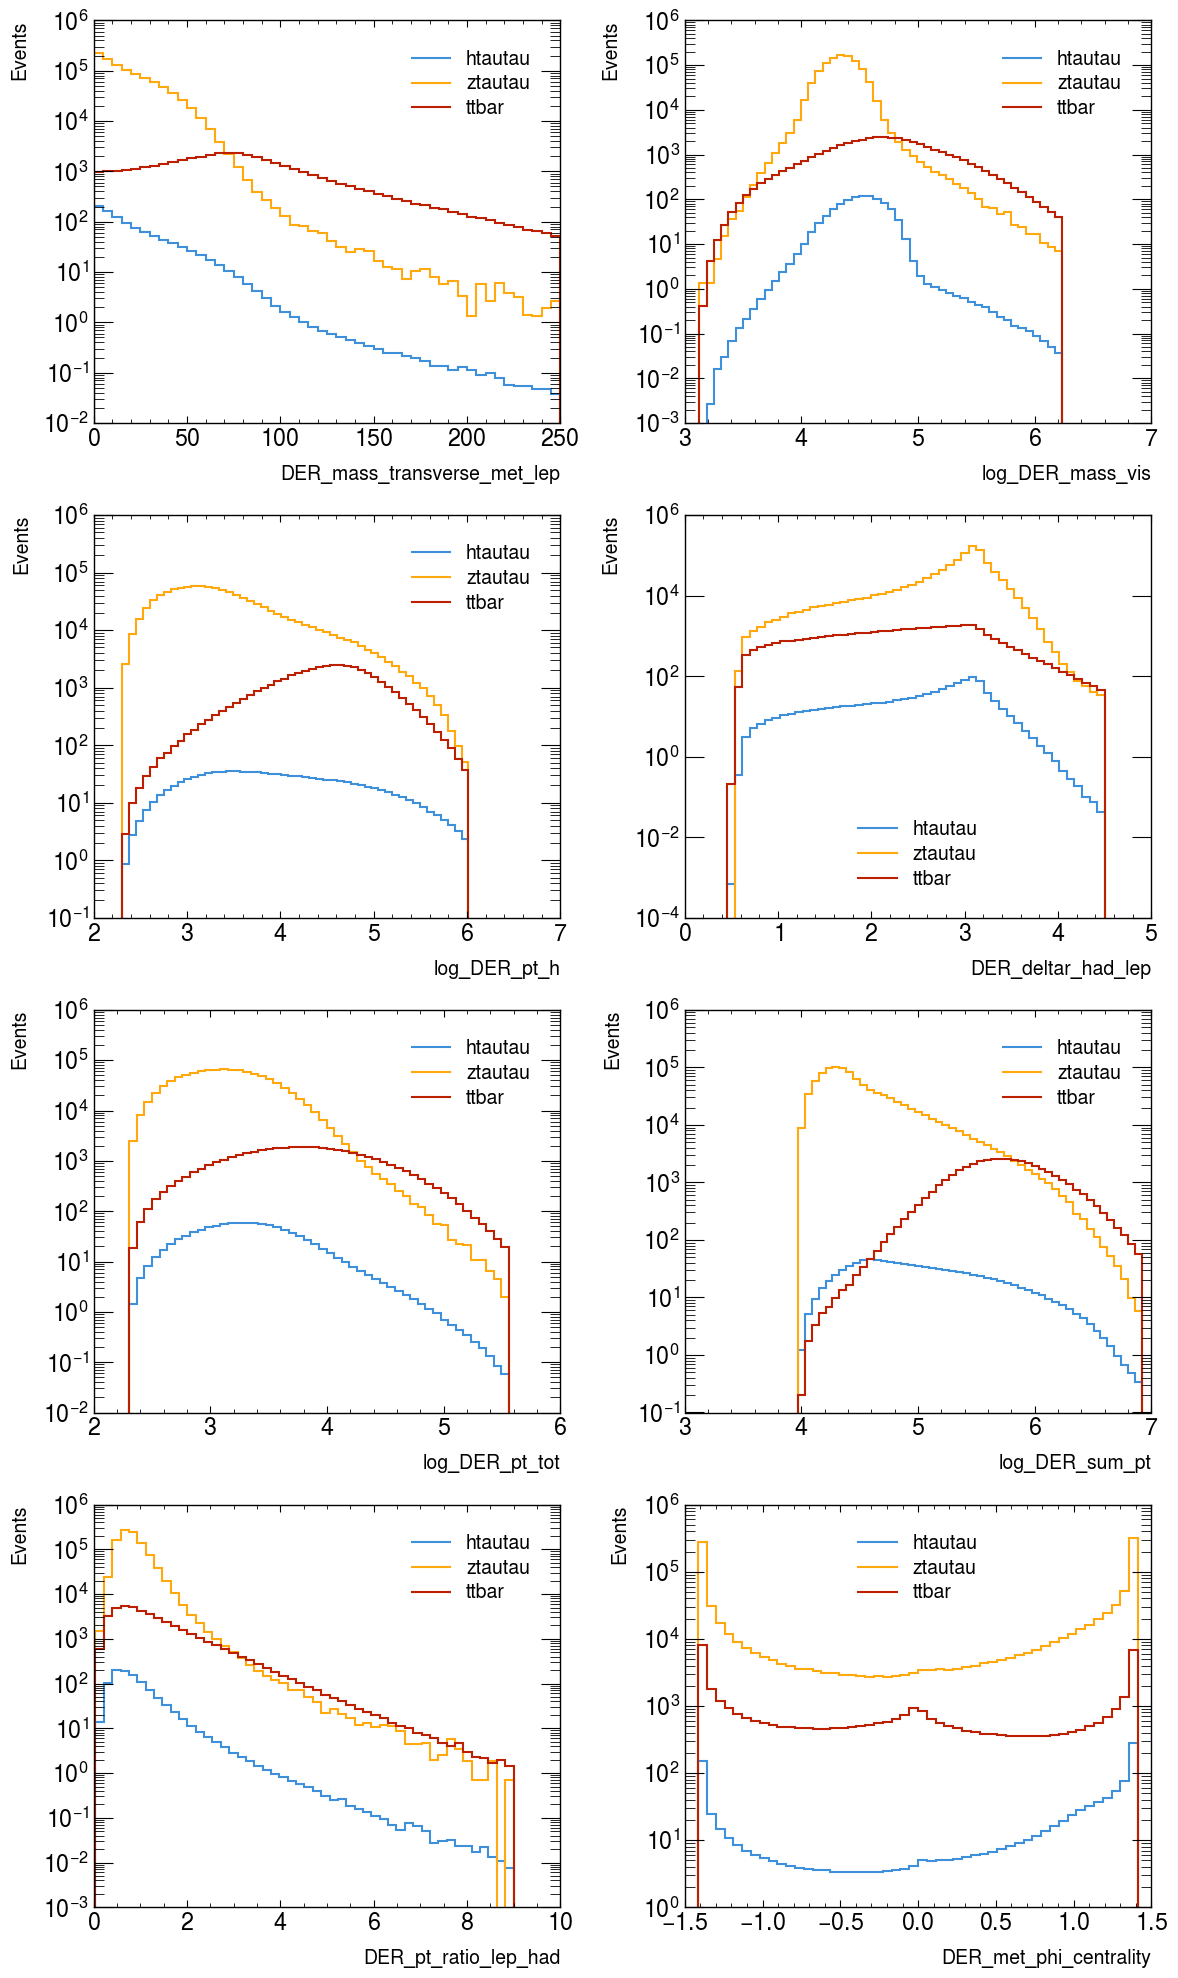

In [23]:
features_to_plot = ['DER_pt_h', 'DER_deltar_had_lep', 'DER_pt_tot', 'DER_sum_pt']
features_to_plot = features
nbins = 50

xlabel_dict = { 
}


fig, axes = plot_kinematic_features(
    features=features_to_plot,
    nbins=nbins,
    dataset=data,
    xlabel_dict=xlabel_dict,
    labels_dict=labels_dict
)
plt.show()
